## Advance EDA

In this notebook we will be Drawing out various insights, plot useful visualizations and also derieve some new features if needed

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from scipy.stats.stats import pearsonr   
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [15]:
data = pd.read_csv('Data/Preprocessed/clean_data.csv', index_col= None)

In [16]:
data

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Employment_status,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,...,Savings_account_balance,Property,Purpose,Gender_male,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Housing_own,Housing_rent,average_employed_years
0,4.219508,1,4,0,1,6,13.971660,4,0,0,...,0,0,0,1,0,0,1,1,0,1.609438
1,3.135494,1,2,0,1,48,15.599070,2,0,0,...,1,0,0,0,1,0,0,1,0,1.252763
2,3.912023,2,3,1,1,12,14.555542,2,0,0,...,1,0,1,1,0,0,1,1,0,1.871802
3,3.828641,2,4,0,1,42,15.880092,2,0,1,...,1,1,2,1,0,0,1,0,0,1.871802
4,3.988984,2,4,0,1,24,15.398605,3,0,0,...,1,2,3,1,0,0,1,0,0,1.252763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.465736,1,4,1,1,12,14.367095,3,0,0,...,1,0,2,0,1,0,0,1,0,1.871802
996,3.713572,1,4,2,1,30,15.165400,4,0,0,...,1,1,4,1,0,0,0,1,0,1.252763
997,3.663562,1,4,0,1,12,13.597356,4,0,0,...,1,2,0,1,0,0,1,1,0,1.609438
998,3.178054,1,4,0,1,45,14.427990,4,0,0,...,1,2,0,1,0,0,1,0,0,1.252763


In [17]:
target = data['high_risk_applicant']

# Bivariate Analysis

Why spearman correlation and why not pearson?

Because Person only considers linear relationship among the variables that is it looks only for a constant increase/decrease with respect to the other variable.

Where as spearman also, takes care of monotonic relationships

<AxesSubplot:>

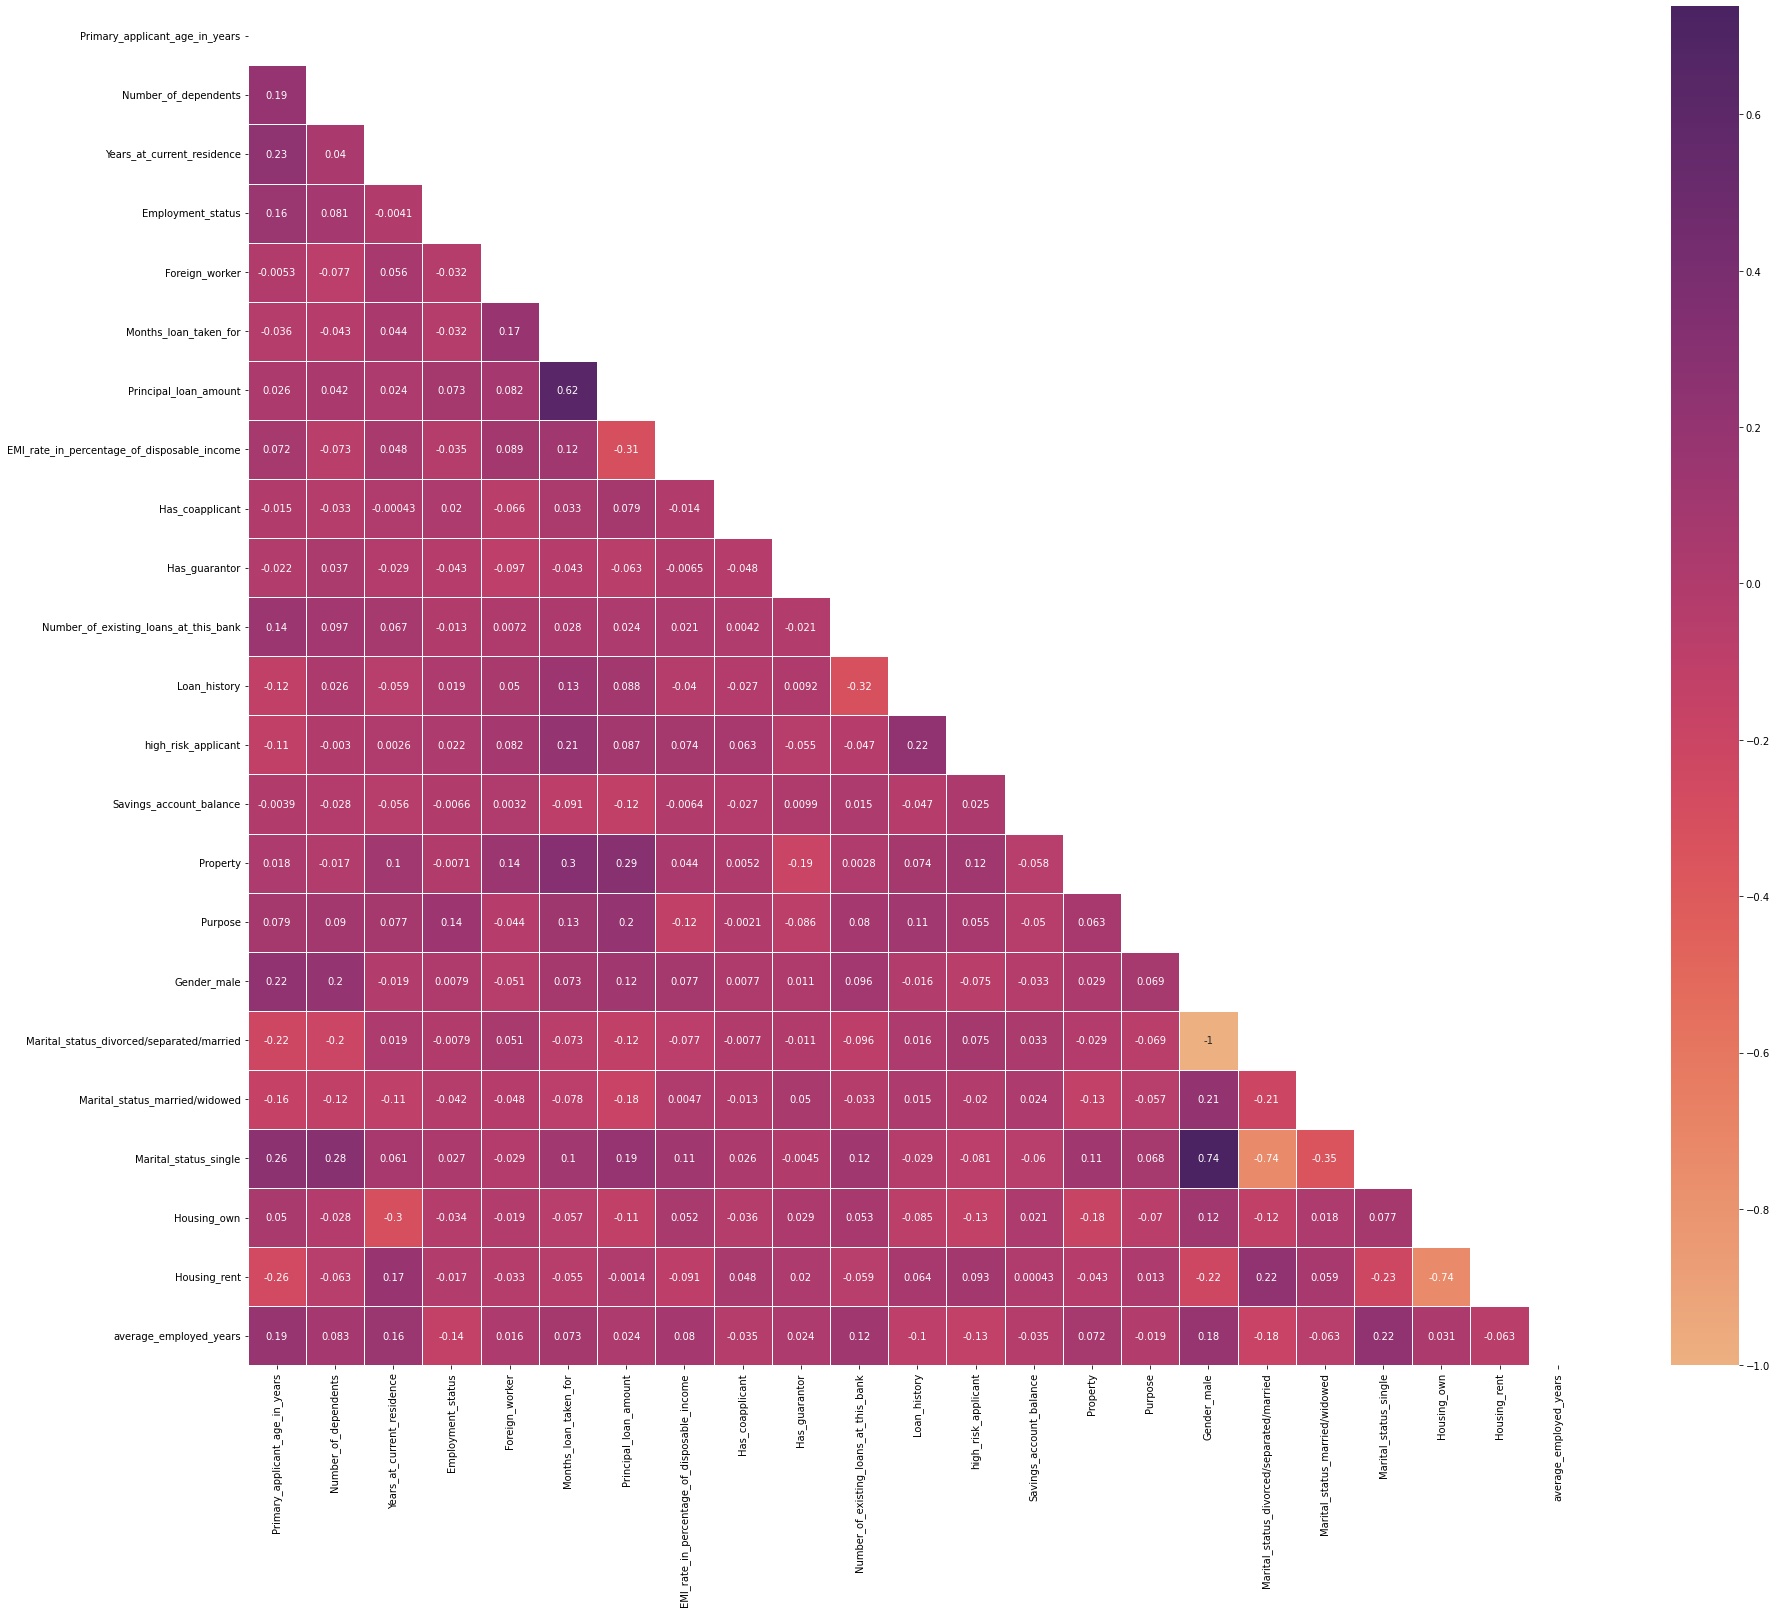

In [18]:
figure(figsize=(30, 25))
mask = np.zeros_like(data.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr('spearman'), annot=True, cmap='flare', linewidths=.5, mask=mask)

## Some Conclusions Drawn

<li>Risk is directly affected by the applicants History.</li>
<li>Males have more people   dependant on them </li>
<li>There are more single males applying for loan😅</li>

#### Now we will be considering a lot of new features and see how they affect the target feature

1. Interest Paid

Interest paid = (Principal * number of years * Rate)/100

In [19]:
data.columns

Index(['Primary_applicant_age_in_years', 'Number_of_dependents',
       'Years_at_current_residence', 'Employment_status', 'Foreign_worker',
       'Months_loan_taken_for', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Has_coapplicant',
       'Has_guarantor', 'Number_of_existing_loans_at_this_bank',
       'Loan_history', 'high_risk_applicant', 'Savings_account_balance',
       'Property', 'Purpose', 'Gender_male',
       'Marital_status_divorced/separated/married',
       'Marital_status_married/widowed', 'Marital_status_single',
       'Housing_own', 'Housing_rent', 'average_employed_years'],
      dtype='object')

In [20]:
interest_paid = (data['EMI_rate_in_percentage_of_disposable_income']*data['Principal_loan_amount']*(data['Months_loan_taken_for']/12) )/100

In [21]:
interest_paid

0      0.279433
1      1.247926
2      0.291111
3      1.111606
4      0.923916
         ...   
995    0.431013
996    1.516540
997    0.543894
998    2.164199
999    1.725338
Length: 1000, dtype: float64

In [22]:
pearsonr(interest_paid, target)

(0.20893702094146974, 2.5116648655210183e-11)

Since, the correlatin is suffieciently low we can add this column to our dataset

In [23]:
data.columns

Index(['Primary_applicant_age_in_years', 'Number_of_dependents',
       'Years_at_current_residence', 'Employment_status', 'Foreign_worker',
       'Months_loan_taken_for', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Has_coapplicant',
       'Has_guarantor', 'Number_of_existing_loans_at_this_bank',
       'Loan_history', 'high_risk_applicant', 'Savings_account_balance',
       'Property', 'Purpose', 'Gender_male',
       'Marital_status_divorced/separated/married',
       'Marital_status_married/widowed', 'Marital_status_single',
       'Housing_own', 'Housing_rent', 'average_employed_years'],
      dtype='object')

In [24]:
data['interest_paid'] = interest_paid

In [31]:
data.columns

Index(['Primary_applicant_age_in_years', 'Number_of_dependents',
       'Years_at_current_residence', 'Employment_status', 'Foreign_worker',
       'Months_loan_taken_for', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Has_coapplicant',
       'Has_guarantor', 'Number_of_existing_loans_at_this_bank',
       'Loan_history', 'high_risk_applicant', 'Savings_account_balance',
       'Property', 'Purpose', 'Gender_male',
       'Marital_status_divorced/separated/married',
       'Marital_status_married/widowed', 'Marital_status_single',
       'Housing_own', 'Housing_rent', 'average_employed_years',
       'interest_paid'],
      dtype='object')

In [85]:
def plot_correlations_of_new_variable(new_var, df):
    corre = {}
    for i in df.columns:
        if i != new_var:
            coeff, p= pearsonr(df[new_var],df[i])
            corre[i]= coeff
    fig = plt.figure(figsize=(10, 5))
    
    values= [i for i in corre.values() if i >0.2 or i<-0.2]    
    keys = [key for key, value in corre.items() if value in values ]
    
        
    
    
    

   
   
# creating the bar plot
    sns.set(rc={'figure.figsize':(25,10)})
    sns.barplot(y = keys, x=values, palette="Blues_d").set(title = f'correlation against {new_var}')
    

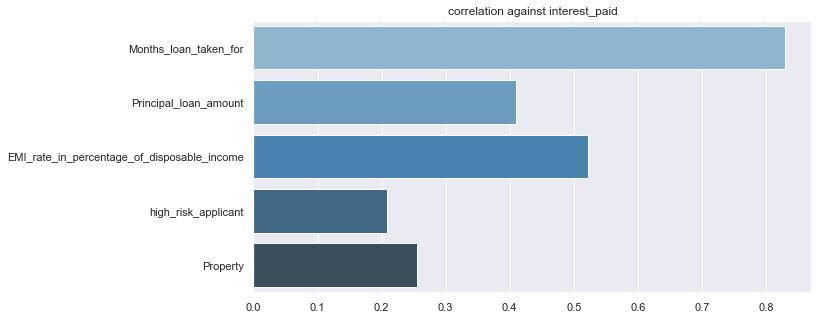

In [86]:
plot_correlations_of_new_variable('interest_paid', data)

As we can see the Parameters used to construct the feature are significnatly related to the interest and hence, these 3 columns can be easily removed.